In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy as sc
import pandas as pd
import math as mt
import ROOT
import os
import random
import MyFunction as mf
from array import array
from ROOT import TCanvas, gStyle, TFile, TProfile, TNtuple, TH1D, TH2D, TH3D, TGraph, TMultiGraph, TPad, THStack, TH1F, TLegend, gROOT 

Welcome to JupyROOT 6.21/01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


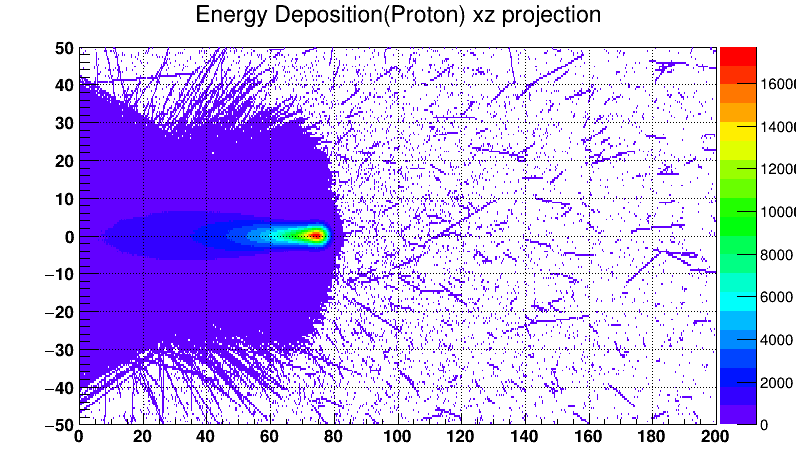

In [80]:
DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Convergent_Data/Min Spot size scan 100MeV/Energy_100_Alpha:_18._Beta:_1360.mm_Sigma_10.mm.root")
Energy_Distribution = DataFile.Get('ProtonEnergyHisto')

c1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 800, 500)

Energy_Distribution_Z = Energy_Distribution.Project3D('xz').Clone('Energy_Distribution_Z')
Energy_Distribution_Z.Scale(1/1000000)
Energy_Distribution_Z.Draw("COLZ")
Energy_Distribution_Z.SetStats(0)
gStyle.SetPalette(1)
c1.Update()
c1.GetFrame().SetFillColor(0)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 0 )
c1.SetGridx()
c1.SetGridy()
c1.Modified()
c1.Update()
c1.Draw()

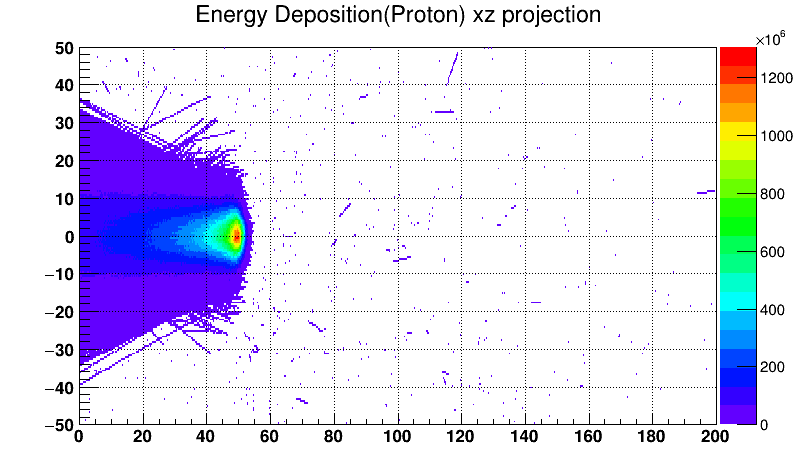

In [6]:
DataFile = ROOT.TFile("/home/fardousr/Desktop/Output/Convergent_Data/Energy_80_Alpha:_5.0_Beta:_393.0mm_Sigma_10.mm.root")
Energy_Distribution = DataFile.Get('ProtonEnergyHisto').Project3D('xz')

c1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 800, 500)


Energy_Distribution.Draw("COLZ")
Energy_Distribution.SetStats(0)
gStyle.SetPalette(1)
c1.Update()
c1.GetFrame().SetFillColor(0)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 0 )
c1.SetGridx()
c1.SetGridy()
c1.Modified()
c1.Update()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


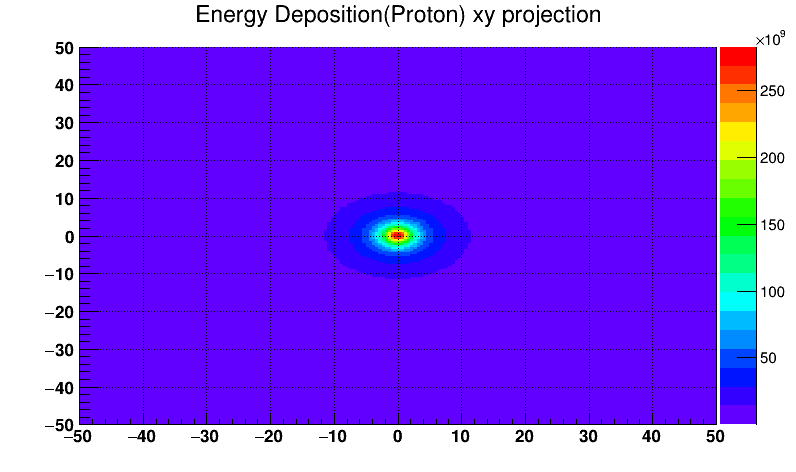

In [24]:

Location ="/home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/"

DataFileList = ['Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root', 'Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root', 'Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root']

DataFile = ROOT.TFile(Location+DataFileList[6])
Energy_Distribution = DataFile.Get('ProtonEnergyHisto').Project3D('xy')

c1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 800, 500)


Energy_Distribution.Draw("COLZ")
Energy_Distribution.SetStats(0)
gStyle.SetPalette(1)
c1.Update()
c1.GetFrame().SetFillColor(0)
c1.GetFrame().SetBorderSize(12)
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor(0)
c1.SetGridx()
c1.SetGridy()
c1.Modified()
c1.Update()
c1.Draw()

In [16]:
DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/"
# DataFileList = os.listdir(DataFileLocation)
# File = pd.DataFrame(DataFileList)
# print(DataFileList)
# display(File)
# DataFile = ROOT.TFile(DataFileLocation+"/"+DataFileList[])

DataFileList = ['Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root', 'Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root', 'Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root', 
                'Energy_350_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root']

Energy_Distribution    =  []
num_proton             =  []

for i in range(0, len(DataFileList)):
    print(DataFileList[i])
    file = DataFileLocation+"/"+DataFileList[i]
    DataFile = ROOT.TFile(file)
    NumProton = DataFile.Get('ParticelCounter').GetBinContent(1)
    print(NumProton)
    num_proton.append(NumProton)
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFileList[i]+"_xy"
    Distribution = Energy.Project3D("xy").Clone(name)
#     RBE = RBEMatrix(file)
#     Distribution.Multiply(RBE)
    Distribution.SetDirectory(0)
    Energy_Distribution.append(Distribution)


cs = TCanvas("cs","cs", 900,700)
gStyle.SetPalette(1)
cs.Divide(2,4)
Radius = ["0.5", "1.0", "2.0", "3.0", "4.0", "6.0", "8.0", "10.0"]
for i in range(0,7):
    cs.cd(i+1);
    cs.SetFillColor( 0 )
    cs.GetFrame().SetFillColor( 21 )
    cs.GetFrame().SetBorderSize( 6 )
    cs.GetFrame().SetBorderMode( -1 )
    
    Histogram = Energy_Distribution[i]
    
    Histogram.Scale(1/num_proton[i])
    maxvalue = Histogram.GetMaximum();
    Histogram.Scale(1/maxvalue)

    Histogram.GetXaxis().SetTitle("Depth [mm]");
    Histogram.GetYaxis().SetTitle("Transverse Position [mm]");
    Histogram.GetXaxis().CenterTitle();
    Histogram.GetYaxis().CenterTitle();
    Histogram.GetXaxis().SetRangeUser(0, 180);
    Histogram.GetYaxis().SetRangeUser(-20, 20);
    Histogram.GetXaxis().SetLabelSize(.04)
    Histogram.GetYaxis().SetLabelSize(.04)
    Histogram.GetZaxis().SetLabelSize(.04)
    Histogram.GetXaxis().SetTitleSize(.04)
    Histogram.GetYaxis().SetTitleSize(.04)
    Title = "Collimator radius : "+Radius[i]
    Histogram.SetTitleSize(.16)
    Histogram.SetStats(0)
    Histogram.SetTitle(Title)
    Histogram.Draw("COLZ")
    cs.SetRightMargin(0.9)
    cs.SetLeftMargin(0.25)
    cs.SetBottomMargin(0.25)
    cs.Modified()
    cs.Update()
    
#cs.Print("/home/fardousr/Desktop/Output/Graphs/Physical Dose 150MeV different Collimator radii.png") 
cs.Draw()

Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root
0.0
Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root
0.0
Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root
0.0
Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root
0.0
Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root
0.0
Energy_350_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root
0.0
Energy_350_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root
0.0
Energy_350_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root
0.0
Energy_350_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root
0.0
Energy_350_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root
0.0


ZeroDivisionError: float division by zero

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cs


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cs
Info in <TCanvas::Print>: png file /home/fardousr/Desktop/Output/Graphs/Physical Dose 350MeV diff alpha at 100mm xy.png has been created


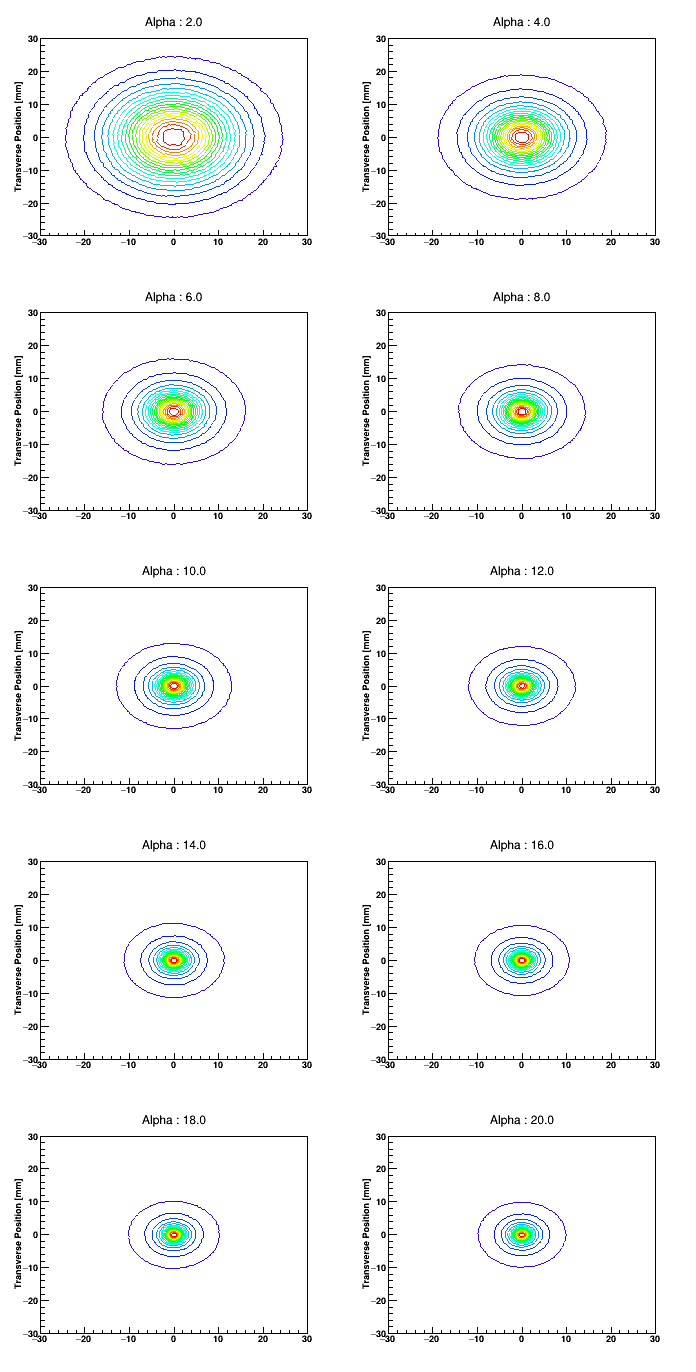

In [27]:
cs = TCanvas("cs","cs", 700,1400)
gStyle.SetPalette(1)
cs.Divide(2,5)
Alpha = ["2.0", "4.0", "6.0", "8.0", "10.0", "12.0", "14.0", "16.0", "18.0", "20.0"]
for i in range(0,10):
    cs.cd(i+1);
    cs.SetFillColor( 0 )
    cs.GetFrame().SetFillColor( 21 )
    cs.GetFrame().SetBorderSize( 6 )
    cs.GetFrame().SetBorderMode( -1 )
    
    Histogram = Energy_Distribution[i]
    
    #Histogram.Scale(1/num_proton[i])
    maxvalue = Histogram.GetMaximum();
    Histogram.Scale(1/maxvalue)

    Histogram.GetXaxis().SetTitle("Transverse Position [mm]");
    Histogram.GetYaxis().SetTitle("Transverse Position [mm]");
    Histogram.GetXaxis().CenterTitle();
    Histogram.GetYaxis().CenterTitle();
    Histogram.GetXaxis().SetRangeUser(-30, 30);
    Histogram.GetYaxis().SetRangeUser(-30, 30);
    Histogram.GetXaxis().SetLabelSize(.04)
    Histogram.GetYaxis().SetLabelSize(.04)
    Histogram.GetZaxis().SetLabelSize(.04)
    Histogram.GetXaxis().SetTitleSize(.04)
    Histogram.GetYaxis().SetTitleSize(.04)
    Title = "Alpha : "+Alpha[i]
    Histogram.SetTitleSize(.16)
    Histogram.SetStats(0)
    Histogram.SetTitle(Title)
    Histogram.Draw("CONT1")
    cs.SetRightMargin(0.9)
    cs.SetLeftMargin(0.25)
    cs.SetBottomMargin(0.25)
    cs.Modified()
    cs.Update()
    
cs.Print("/home/fardousr/Desktop/Output/Graphs/Physical Dose 350MeV diff alpha at 100mm xy.png") 
cs.Draw()

In [11]:
DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV"
DataFileList = os.listdir(DataFileLocation)
print(DataFileList)

['Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root', 'Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root', 'Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root', 'Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root', 'Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root', 'Simulation Info.txt', 'Energy_350_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root']


Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root Title: 
Name: Alpha_0 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root Title: 
Name: Alpha_1 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root Title: 
Name: Alpha_2 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root Title: 
Name: Alpha_3 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root Title: 
Name: Alpha_4 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergen

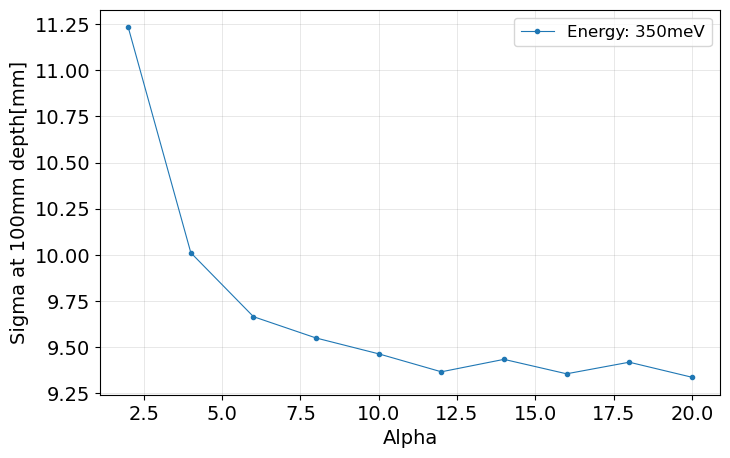

In [28]:
plt.rcdefaults()
params = {'figure.figsize'   : (8, 5),
          'legend.fontsize'  : 12,
          'axes.labelsize'   : 14,
          'axes.titlesize'   : 14,
          'xtick.labelsize'  : 14,
          'ytick.labelsize'  : 14,
          'axes.facecolor'   : 'white'}
pylab.rcParams.update(params)

DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/"

DataFileList = ['Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root', 'Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root', 'Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root', 
                'Energy_350_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root']

alpha                  = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20] 

sigma_100mm            =  []

for i in range(0, len(DataFileList)):
    file = DataFileLocation+DataFileList[i]
    DataFile = ROOT.TFile(file)
    print(DataFile)
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    print(Energy)
    name = DataFileList[i]+"_xz"
    Distribution = Energy.ProjectionY(name, -200, 200, 99*4, 101*4).Clone(name)
    sigma_100mm.append(Distribution.GetStdDev())
    
    
plt.plot(alpha, sigma_100mm,'.-', label = 'Energy: 350meV', linewidth=0.8)
plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
plt.legend(loc='upper right')
plt.xlabel("Alpha")
plt.ylabel("Sigma at 100mm depth[mm]")
#plt.savefig("/home/fardousr/Desktop/Output/Graphs/Sigma at BP 100MeV alpha 6 to 26.png", dpi = 500)
plt.show()


Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root Title: 
Name: Alpha_0 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root Title: 
Name: Alpha_1 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root Title: 
Name: Alpha_2 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root Title: 
Name: Alpha_3 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root Title: 
Name: Alpha_4 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergen

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


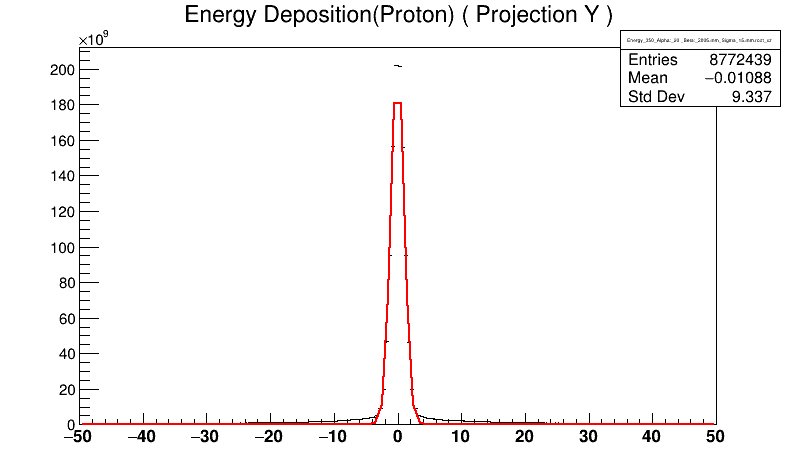

In [33]:
DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/"

DataFileList = ['Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root', 'Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root', 'Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root', 
                'Energy_350_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root']

alpha                  = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20] 

sigma_100mm            =  [7.56503, 4.09189, 2.78532, 2.13402, 1.74881, 1.49953, 1.32822, 1.20595, 1.11419, 1.04257]

c1 = TCanvas( 'c1', 'c1', 800, 500 )

for i in range(len(DataFileList)):
    file = DataFileLocation+DataFileList[i]
    DataFile = ROOT.TFile(file)
    print(DataFile)
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    print(Energy)
    name = DataFileList[i]+"_xz"
    Distribution = Energy.ProjectionY(name, -200, 200, 99*4, 101*4).Clone(name)
    Distribution.Fit("gaus", "M", "SAME")
    Distribution.Draw("SAME")
    
c1.Update()
c1.Draw()

Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/Energy_350_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root Title: 
Name: Alpha_12 Title: Energy Deposition(Proton) NbinsX: 200
 FCN=1329.35 FROM HESSE     STATUS=OK             16 CALLS          82 TOTAL
                     EDM=5.91426e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.48182e+10   5.70742e+06   3.53293e+03   1.37674e-11
   2  Mean         3.25005e-02   4.77820e-03   1.70172e-05   2.26703e-01
   3  Sigma        1.49392e+01   3.63837e-03   2.33107e-07  -3.80847e-01
 FCN=667986 FROM HESSE     STATUS=OK             16 CALLS         148 TOTAL
                     EDM=7.55124e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


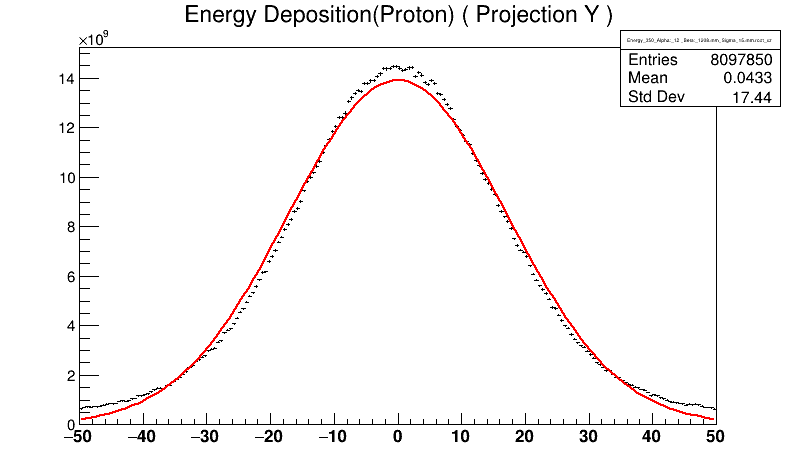

In [4]:
DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/High energy 350MeV/"

DataFileList = ['Energy_350_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root', 'Energy_350_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root', 'Energy_350_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root',
                'Energy_350_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root', 
                'Energy_350_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root', 'Energy_350_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root']

alpha                  = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20] 

sigma_100mm            =  [7.56503, 4.09189, 2.78532, 2.13402, 1.74881, 1.49953, 1.32822, 1.20595, 1.11419, 1.04257]

c1 = TCanvas( 'c1', 'c1', 800, 500 )

i = 5

file = DataFileLocation+DataFileList[i]
DataFile = ROOT.TFile(file)
print(DataFile)
Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(alpha[i]))
Energy.SetDirectory(0)
print(Energy)
name = DataFileList[i]+"_xz"
Distribution = Energy.ProjectionY(name, -200, 200, 1*4, 3*4).Clone(name)
Distribution.Fit("gaus", "M", "SAME")
Distribution.Draw("SAME")

Distribution = Energy.ProjectionY(name, -200, 200, 99*4, 101*4).Clone(name)
Distribution.Fit("gaus", "M", "SAME")
Distribution.Draw("SAME")

Distribution = Energy.ProjectionY(name, -200, 200, 198*4, 200*4).Clone(name)
Distribution.Fit("gaus", "M", "SAME")
Distribution.Draw("SAME")
    
c1.Update()
c1.Draw()

Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)/Energy_250_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root Title: 
Name: Alpha_0 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)/Energy_250_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root Title: 
Name: Alpha_1 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)/Energy_250_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root Title: 
Name: Alpha_2 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)/Energy_250_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root Title: 
Name: Alpha_3 Title: Energy Deposition(Proton) NbinsX: 200
Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)/Energy_250_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root Title: 
Name: Alpha_4 Title: Energy D

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


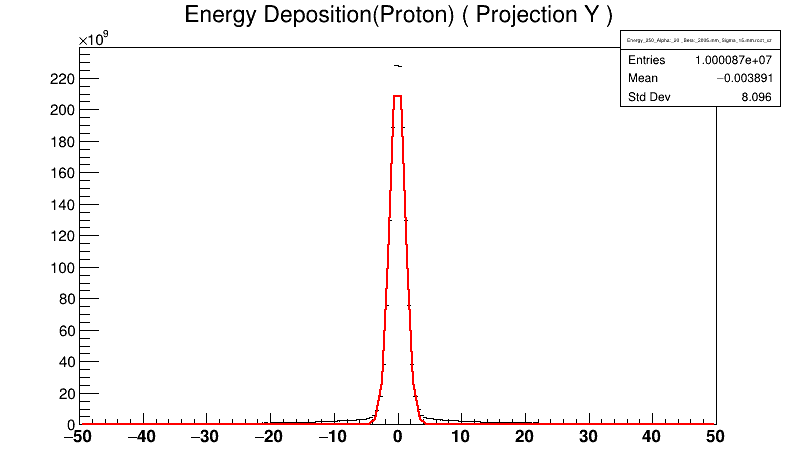

In [13]:
DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)/"

DataFileList = ['Energy_250_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root', 'Energy_250_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root',
                'Energy_250_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root', 'Energy_250_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root',
                'Energy_250_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root', 'Energy_250_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root', 
                'Energy_250_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root', 'Energy_250_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root', 
                'Energy_250_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root', 'Energy_250_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root']


alpha                  = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20] 

sigma_100mm            =  [7.56503, 4.09189, 2.78532, 2.13402, 1.74881, 1.49953, 1.32822, 1.20595, 1.11419, 1.04257]
sigma_gaussian =[]
c1 = TCanvas( 'c1', 'c1', 800, 500 )

for i in range(len(DataFileList)):
    file = DataFileLocation+DataFileList[i]
    DataFile = ROOT.TFile(file)
    print(DataFile)
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    print(Energy)
    name = DataFileList[i]+"_xz"
    Distribution = Energy.ProjectionY(name, -200, 200, 99*4, 101*4).Clone(name)
    Distribution.Fit("gaus", "M", "SAME")
    Distribution.Draw("SAME")
    
c1.Update()
c1.Draw()
print(sigma_gaussian)

In [16]:
print(sigma_gaussian[0].GetMatrixArray())

NameError: name 'plotRoot1DHistogram' is not defined

Name: /home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)/Energy_250_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root Title: 
Name: Alpha_1 Title: Energy Deposition(Proton) NbinsX: 200
4.081088563426459
 FCN=365825 FROM HESSE     STATUS=OK             16 CALLS         117 TOTAL
                     EDM=2.32102e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.17854e+10   2.86450e+07   1.71150e+04  -1.21755e-12
   2  Mean        -1.92951e-03   1.35963e-03   8.03077e-05  -9.73725e-02
   3  Sigma        4.08109e+00   1.23007e-03   3.02560e-06   9.68882e+00


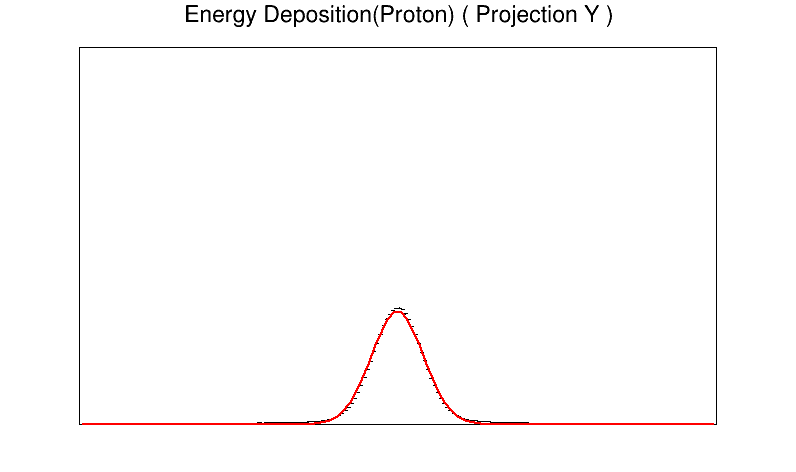

In [25]:
DataFileLocation = "/home/fardousr/Desktop/Output/Convergent_Data/High energy 250MeV(Constant area)/"

DataFileList = ['Energy_250_Alpha:_2.0_Beta:_250.0mm_Sigma_15.mm.root', 'Energy_250_Alpha:_4.0_Beta:_425.0mm_Sigma_15.mm.root',
                'Energy_250_Alpha:_6.0_Beta:_616.6mm_Sigma_15.mm.root', 'Energy_250_Alpha:_8.0_Beta:_812.5mm_Sigma_15.mm.root',
                'Energy_250_Alpha:_10._Beta:_1010.mm_Sigma_15.mm.root', 'Energy_250_Alpha:_12._Beta:_1208.mm_Sigma_15.mm.root', 
                'Energy_250_Alpha:_14._Beta:_1407.mm_Sigma_15.mm.root', 'Energy_250_Alpha:_16._Beta:_1606.mm_Sigma_15.mm.root', 
                'Energy_250_Alpha:_18._Beta:_1805.mm_Sigma_15.mm.root', 'Energy_250_Alpha:_20._Beta:_2005.mm_Sigma_15.mm.root']


i=1

file = DataFileLocation+DataFileList[i]
DataFile = ROOT.TFile(file)
print(DataFile)
Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
Energy.SetDirectory(0)
print(Energy)
name = DataFileList[i]+"_xz"
Distribution = Energy.ProjectionY(name, -200, 200, 99*4, 101*4).Clone(name)
x = Distribution.Fit("gaus", "M", "SAME")
Distribution.Draw("SAME")

parameter = Distribution.GetListOfFunctions().FindObject("gaus");
c = parameter.GetParameter(2)

c1.Update()
c1.Draw()
print(c)

In [26]:
print(c)

4.081088563426459
